# Eine kurze Geschichte der DCT


### Die Idee

Wir haben ein Signal an $N$ stellen abgetastet und erhalten einen $N$-stelligen Vektor $s$, der unsere Daten darstellt:

$$
    s = (s_0,...,s_{N-1})^T
$$

Die Grundidee besteht nun daraus, eine neue Basis für unseren $N$-dimensionalen Vektorraum zu finden, die so beschaffen ist, dass wir einen überwiegenden Teil der Informationen in unseren Daten mit wesentlich weniger als $N$ Koeffizienten speichern können. Dafür sind zwei Dinge wesentlich: Energie-Kompaktheit und Dekorrelation. Eine Basis, die diese Bedingungen erfüllt, ist eine Familie von Vektoren $b_k$, die so aussehen:

$$
 b_k(n) = \alpha_k \cos \left( \dfrac{(2n+1)k\pi}{2N} \right),
$$
$$
 n=0, 1, ..., N-1,
$$
$$
\alpha_0 = \sqrt{\dfrac{1}{N}},\ \ \alpha_k = \sqrt{\dfrac{2}{N}},\ \ k=1,..., N-1
$$

Schauen wir uns diese Basisfunktionen der Einfachheit halber einmal für $N=4$ an:

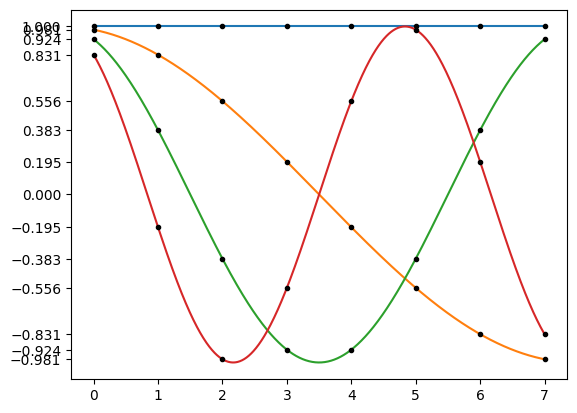

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def plotbasefunctions(n, k):
    fig, ax = plt.subplots()
    x = np.linspace(0,n-1,1000)
    x_marker = np.linspace(0,n-1,n)
    ax.set_xticks(x_marker)
    y_ticks = np.array([0])
    for i in range(k):
        y = np.cos((2*x+1)*np.pi*i / (2*n))
        y_marker = np.cos((2*x_marker+1)*np.pi*i / (2*n)).round(3)
        ax.plot(x,y)
        ax.plot(x_marker, y_marker, '.', color='k')
        y_ticks= np.append(y_ticks, y_marker)
    y_ticks = set(y_ticks)
    y_ticks = list(y_ticks)
    ax.set_yticks(y_ticks)
    plt.savefig('base8func.svg')
    plt.show()

plotbasefunctions(8,4)

Das besondere an dieser Wahl der Basis wird klar, wenn wir uns denn Fall $N=3$ inklusive der Faktoren $\alpha_k$ anschauen. Unsere Basisvektoren sind dann

$$
    b_0 = \sqrt{\dfrac{1}{3}} \cdot 
    \begin{pmatrix}
         1\\
         1\\
         1
    \end{pmatrix},\ \ 
    b_1 = \sqrt{\dfrac{2}{3}} \cdot
    \begin{pmatrix}
         \cos \left( \dfrac{\pi}{6} \right)\\
         \cos \left( \dfrac{3\pi}{6} \right)\\
         \cos \left( \dfrac{5\pi}{6} \right)
    \end{pmatrix},\ \
    b_2 = \sqrt{\dfrac{2}{3}} \cdot
    \begin{pmatrix}
         \cos \left( \dfrac{2\pi}{6} \right)\\
         \cos \left( \dfrac{6\pi}{6} \right)\\
         \cos \left( \dfrac{10\pi}{6} \right)
    \end{pmatrix}
$$

1.0


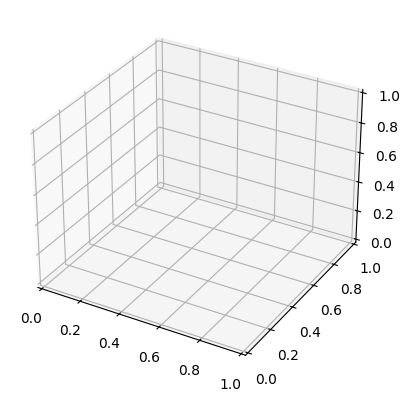

In [2]:
b_0 = np.array([np.sqrt(1/3), np.sqrt(1/3), np.sqrt(1/3)])
b_1 = np.array([np.cos(np.pi/6), np.cos(np.pi*3/6), np.cos(np.pi*5/6)]) * np.sqrt(2/3)
b_2 = np.array([np.cos(np.pi*2/6), np.cos(np.pi*3*2/6), np.cos(np.pi*5*2/6)]) * np.sqrt(2/3)
print(np.linalg.norm(b_1))

ax = plt.figure().add_subplot(projection='3d')

Die Basisvektoren sind orthogonal zueinander und haben alle die Länge $1$. Die Basisvektoren bilden also eine Orthonormalsystem. Das heißt auch, dass wir unsere Transformation als orthogonale Matrix darstellen können, deren Inverse gleichzeitig ihre Transponierte ist. Aber langsam, schauen wir uns an, wie wir unsere ursprünglichen Daten zurückbekommen, wenn wir die Koeffizienten $t(k)$ kennen. Es gilt nämlich

$$
    s = \sum_{k=0}^{N-1} t(k) b_k.
$$

In Matrix-Schreibweise sieht das ganze so aus:

$$
    s = 
    \begin{pmatrix}
         s_0\\
         \vdots\\
         s_{N-1}
    \end{pmatrix}
    = 
    \begin{pmatrix}
         1 & \cdots & 1\\
         \vdots & \ddots & \vdots\\
         \cos \left( \dfrac{(2n+1)N-1\pi}{2N} \right)
    \end{pmatrix}
$$

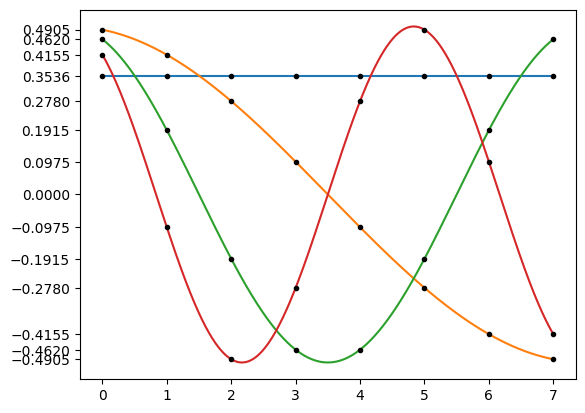

In [3]:
def plotbasefunctionko(n, k):
    fig, ax = plt.subplots()
    x = np.linspace(0,n-1,1000)
    x_marker = np.linspace(0,n-1,n)
    ax.set_xticks(x_marker)
    y_ticks = np.array([0])
    y = np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_marker = np.sqrt(1/n) * np.cos((2*x_marker+1)*np.pi*0 / (2*n))
    ax.plot(x,y)
    ax.plot(x_marker, y_marker, '.', color='k')
    y_ticks= np.append(y_ticks, y_marker)
    for i in range(1,k):
        y = np.sqrt(2/n) * np.cos((2*x+1)*np.pi*i / (2*n))
        y_marker = np.sqrt(2/n) * np.cos((2*x_marker+1)*np.pi*i / (2*n)).round(3)
        ax.plot(x,y)
        ax.plot(x_marker, y_marker, '.', color='k')
        y_ticks= np.append(y_ticks, y_marker)
    y_ticks = set(y_ticks)
    y_ticks = list(y_ticks)
    ax.set_yticks(y_ticks)
    plt.savefig('base8funcko.svg')
    plt.show()

plotbasefunctionko(8,4)


Skalierung sorgt dafür, dass Koeffizienten vektor bei Transformation erlaubt vergleich zwischen Koeffizienten.

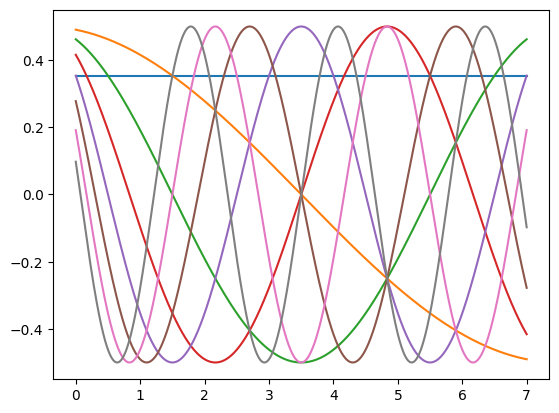

In [11]:
def plotbasefunctionkoraw(n, k):
    fig, ax = plt.subplots()
    x = np.linspace(0,n-1,1000)
    x_marker = np.linspace(0,n-1,n)
    ax.set_xticks(x_marker)
    y_ticks = np.array([0])
    y = np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_marker = np.sqrt(1/n) * np.cos((2*x_marker+1)*np.pi*0 / (2*n))
    ax.plot(x,y)
    y_ticks= np.append(y_ticks, y_marker)
    for i in range(1,k):
        y = np.sqrt(2/n) * np.cos((2*x+1)*np.pi*i / (2*n))
        y_marker = np.sqrt(2/n) * np.cos((2*x_marker+1)*np.pi*i / (2*n)).round(3)
        ax.plot(x,y)
        y_ticks= np.append(y_ticks, y_marker)
    y_ticks = set(y_ticks)
    y_ticks = list(y_ticks)
    plt.savefig('base8funckoraw.svg')
    plt.show()

plotbasefunctionkoraw(8,8)

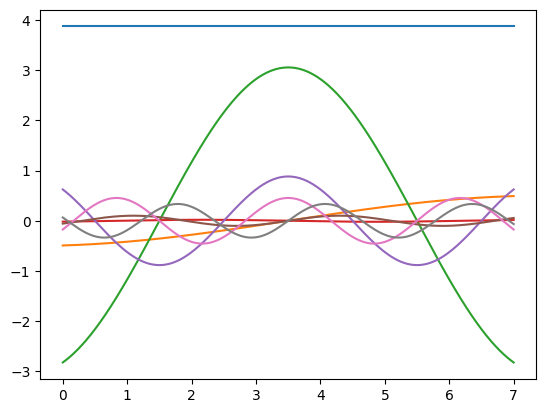

In [12]:
t = [10.96015511, -1.00367261, -6.11730234, -0.04040453,  1.76776695,  -0.20312728, -0.9102813 ,  0.6706326 ]

def plotbasefunctionkoko(n, k):
    fig, ax = plt.subplots()
    x = np.linspace(0,n-1,1000)
    x_marker = np.linspace(0,n-1,n)
    ax.set_xticks(x_marker)
    y_ticks = np.array([0])
    y = t[0] * np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_marker = t[0] * np.sqrt(1/n) * np.cos((2*x_marker+1)*np.pi*0 / (2*n))
    ax.plot(x,y)
    y_ticks= np.append(y_ticks, y_marker)
    for i in range(1,k):
        y = t[i] * np.sqrt(2/n) * np.cos((2*x+1)*np.pi*i / (2*n))
        y_marker = t[i] * np.sqrt(2/n) * np.cos((2*x_marker+1)*np.pi*i / (2*n)).round(3)
        ax.plot(x,y)
        y_ticks= np.append(y_ticks, y_marker)
    y_ticks = set(y_ticks)
    y_ticks = list(y_ticks)
    plt.savefig('base8funckoko.svg')
    plt.show()

plotbasefunctionkoko(8, 8)

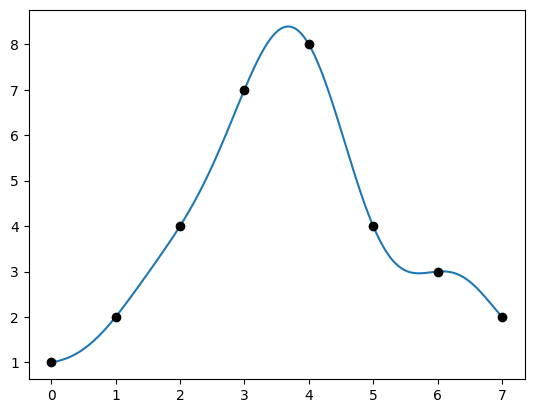

In [21]:
def plotbasefunctionkoko(n, k):
    fig, ax = plt.subplots()
    x = np.linspace(0,n-1,1000)
    x_marker = np.linspace(0,n-1,n)
    ax.set_xticks(x_marker)
    y_ticks = np.array([0])
    y = t[0] * np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_marker = t[0] * np.sqrt(1/n) * np.cos((2*x_marker+1)*np.pi*0 / (2*n))
    y_ticks= np.append(y_ticks, y_marker)
    y_sum = y = t[0] * np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_dots = [1, 2, 4, 7, 8, 4, 3, 2]
    for i in range(1,k):
        y_sum += t[i] * np.sqrt(2/n) * np.cos((2*x+1)*np.pi*i / (2*n))
    ax.plot(x, y_sum)
    ax.plot(x_marker, y_dots, 'o', color = 'k')
    plt.savefig('interpolexact.svg')
    plt.show()

plotbasefunctionkoko(8, 8)

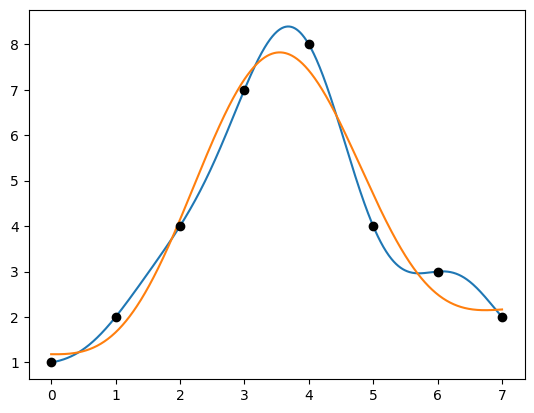

In [44]:
t2 = [10.96015511, -1.00367261, -6.11730234, 0,  1.76776695,  0, 0 ,  0 ]

def interpol2(n, k):
    fig, ax = plt.subplots()
    x = np.linspace(0,n-1,1000)
    x_marker = np.linspace(0,n-1,n)
    ax.set_xticks(x_marker)
    y_ticks = np.array([0])
    y = t2[0] * np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_marker = t[0] * np.sqrt(1/n) * np.cos((2*x_marker+1)*np.pi*0 / (2*n))
    y_sum = y = t[0] * np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_sum2 = y = t2[0] * np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_dots = [1, 2, 4, 7, 8, 4, 3, 2]
    for i in range(1,k):
        y_sum2 += t2[i] * np.sqrt(2/n) * np.cos((2*x+1)*np.pi*i / (2*n))
        y_sum += t[i] * np.sqrt(2/n) * np.cos((2*x+1)*np.pi*i / (2*n))
    ax.plot(x, y_sum)
    ax.plot(x, y_sum2)
    ax.plot(x_marker, y_dots, 'o', color = 'k')    
    plt.savefig('interpolerror1.svg')
    plt.show()

interpol2(8, 8)


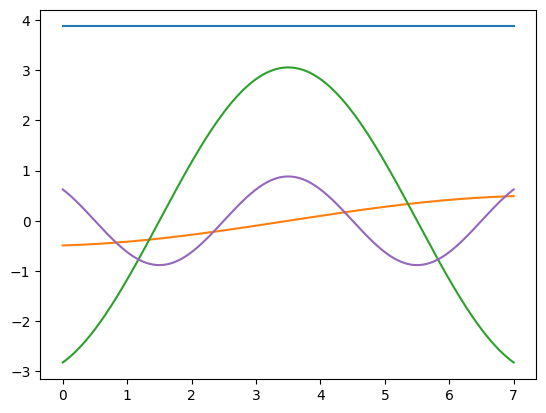

In [40]:
def interpol3(n, k):
    fig, ax = plt.subplots()
    x = np.linspace(0,n-1,1000)
    x_marker = np.linspace(0,n-1,n)
    ax.set_xticks(x_marker)
    y_ticks = np.array([0])
    y = t2[0] * np.sqrt(1/n) * np.cos((2*x+1)*np.pi*0 / (2*n))
    y_marker = t2[0] * np.sqrt(1/n) * np.cos((2*x_marker+1)*np.pi*0 / (2*n))
    ax.plot(x,y)
    y_ticks= np.append(y_ticks, y_marker)
    for i in list([1,2]):
        y = t2[i] * np.sqrt(2/n) * np.cos((2*x+1)*np.pi*i / (2*n))
        y_marker = t2[i] * np.sqrt(2/n) * np.cos((2*x_marker+1)*np.pi*i / (2*n)).round(3)
        ax.plot(x,y)
        y_ticks= np.append(y_ticks, y_marker)
    ax.plot(x, t2[4] * np.sqrt(2/n) * np.cos((2*x+1)*np.pi*4 / (2*n)), color='tab:purple')
    y_ticks = set(y_ticks)
    y_ticks = list(y_ticks)
    plt.savefig('interpolerror.svg')
    plt.show()

interpol3(8, 8)